# Introduction
### App Name: Heat Control Predictor

Several major cities around the world experience a phenomenon known as Urban Heat Island (UHI). UHI refers to the higher temperature of the urban environment compared to the surrounding rural environment. This higher temperature can have negative impacts on human health, such as increased risk of heat-related illnesses and reduced quality of life.

This app aims to predict the health impact of UHI in major cities around the world. The app will use machine learning models to predict the health impact of UHI based on various factors, such as temperature, humidity, and wind speed.

Our dataset contains more than 100k rows with various features related to UHI, such as temperature, humidity, wind speed, and more. We will use this dataset to train our machine learning models and create an app that predicts the health impact of UHI in major cities around the world.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import joblib


In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,City Name,Latitude,Longitude,Elevation (m),Temperature (°C),Land Cover,Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),GDP per Capita (USD)
0,City_236,40.014907,135.759794,1657.234222,32.140727,Industrial,638.140184,29866.608120,90.967582,51.032061,20.060893,0.017909,46.681317,1750.054664,13551.38192
1,City_487,-81.752906,67.784550,1781.007943,28.199772,Water,2757.814606,25461.567500,121.919061,17.819991,45.591306,1.585266,43.291975,758.591768,41967.28373
2,City_21,20.126899,33.924075,3140.598901,11.492930,Water,6020.462986,2539.737270,169.190188,51.045248,10.525874,8.614523,76.935296,2494.912602,17335.37251
3,City_216,-47.308667,154.638241,992.282813,34.909265,Green Space,9491.952711,32146.724390,90.989624,19.211930,49.900393,0.297596,42.739059,1762.646698,31400.53605
4,City_292,-83.425194,31.018268,597.192562,28.465786,Water,5191.476501,2513.126338,92.082516,51.178231,21.993127,19.375498,43.509082,2134.723878,27399.94789


### Feature Removal
We want to remove the columns that are not included in the user input.

In [3]:
removed_columns = ['City Name', 'Latitude', 'Longitude', 'Elevation (m)', 'GDP per Capita (USD)']

df = df.drop(columns=removed_columns)
df.head()

,Temperature (°C),Land Cover,Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm)
0,32.140727,Industrial,638.140184,29866.608120,90.967582,51.032061,20.060893,0.017909,46.681317,1750.054664
1,28.199772,Water,2757.814606,25461.567500,121.919061,17.819991,45.591306,1.585266,43.291975,758.591768
2,11.492930,Water,6020.462986,2539.737270,169.190188,51.045248,10.525874,8.614523,76.935296,2494.912602
3,34.909265,Green Space,9491.952711,32146.724390,90.989624,19.211930,49.900393,0.297596,42.739059,1762.646698
4,28.465786,Water,5191.476501,2513.126338,92.082516,51.178231,21.993127,19.375498,43.509082,2134.723878


In [4]:
df.describe()


,Temperature (°C),Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm)
count,118055.000000,118055.000000,117890.000000,118055.000000,118055.000000,118055.000000,118055.000000,117897.000000,118055.000000
mean,22.406477,5236.460289,26177.192182,117.928298,34.271996,24.169256,15.190071,59.637260,1510.617984
std,7.169656,2691.600552,14009.853574,48.496328,14.353613,14.014521,8.725308,11.359611,590.449197
min,10.052493,504.427341,1018.388794,29.918825,10.007400,0.001532,0.006790,40.111715,512.771569
25%,16.020114,2781.430204,14092.780615,77.098125,21.714111,12.013701,7.472904,50.416814,974.354274
50%,22.701893,5279.746380,26837.714635,117.007111,33.173251,24.994689,14.777760,59.075634,1535.657857
75%,28.432071,7479.845057,38404.838475,160.942839,47.075378,34.607529,22.948420,68.988991,2023.547441
max,35.073791,10021.092840,50125.983500,199.858713,60.136742,50.048999,29.985588,80.203387,2504.278483


In [5]:
df.isnull().sum()

Temperature (°C)                         0
Land Cover                               0
Population Density (people/km²)          0
Energy Consumption (kWh)               165
Air Quality Index (AQI)                  0
Urban Greenness Ratio (%)                0
Health Impact (Mortality Rate/100k)      0
Wind Speed (km/h)                        0
Humidity (%)                           158
Annual Rainfall (mm)                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(55)

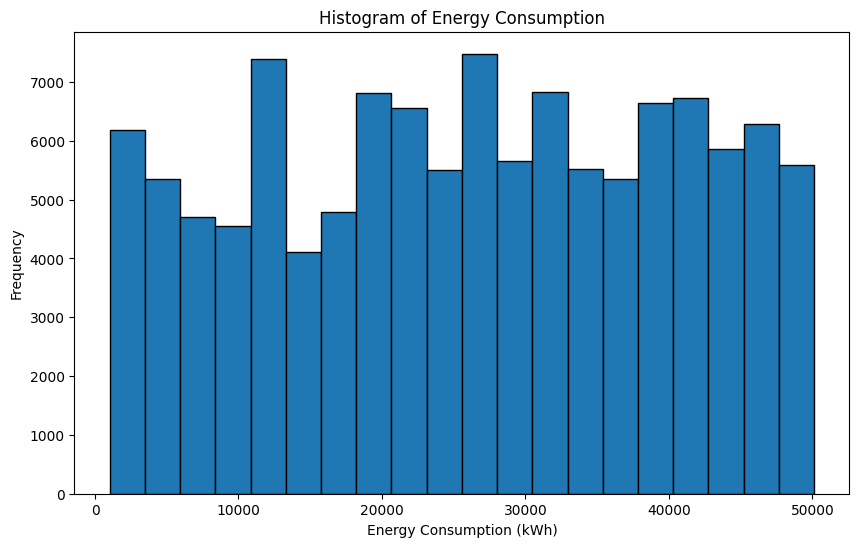

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['Energy Consumption (kWh)'], bins=20, edgecolor='k')
plt.title('Histogram of Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

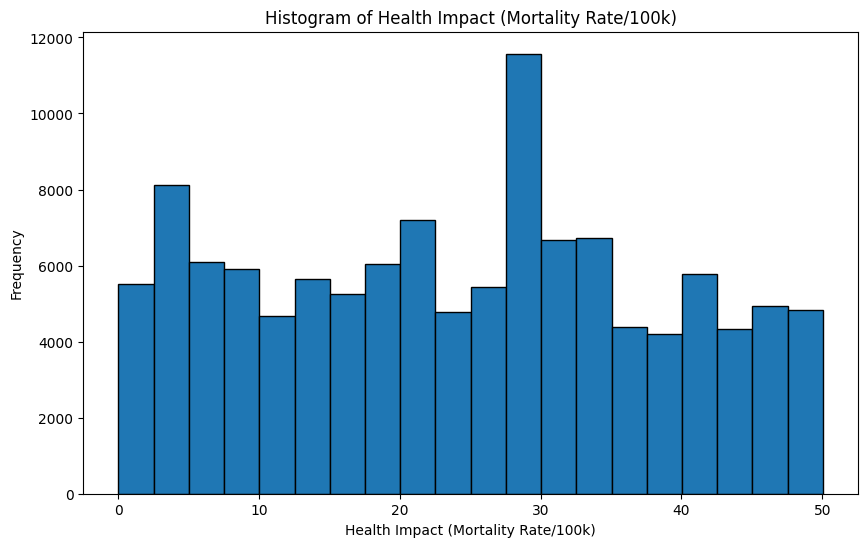

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['Health Impact (Mortality Rate/100k)'], bins=20, edgecolor='k')
plt.title('Histogram of Health Impact (Mortality Rate/100k)')
plt.xlabel('Health Impact (Mortality Rate/100k)')
plt.ylabel('Frequency')
plt.show()

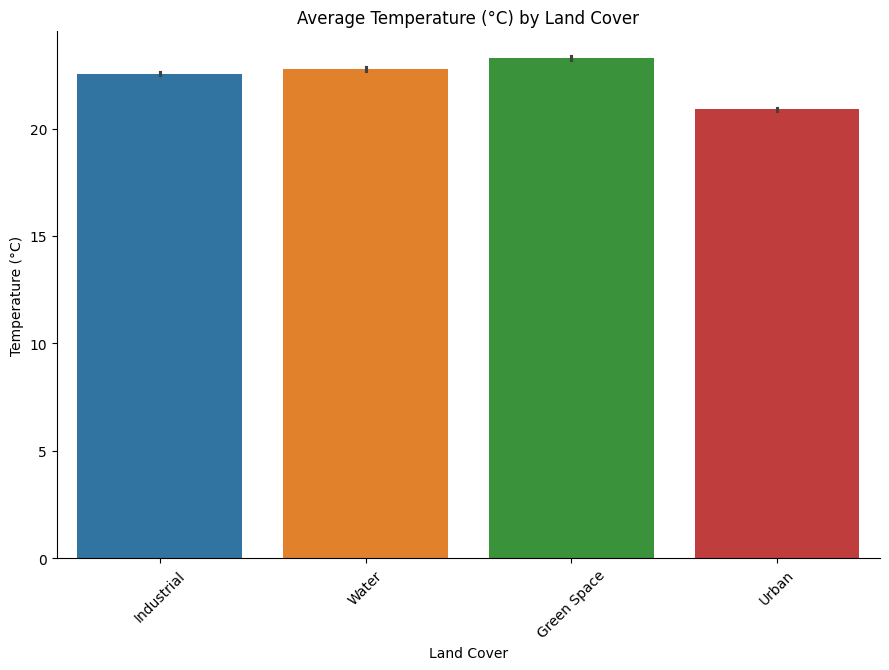

In [9]:
sns.catplot(x='Land Cover', y='Temperature (°C)', hue='Land Cover', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Average Temperature (°C) by Land Cover')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Land Cover', ylabel='Health Impact (Mortality Rate/100k)'>

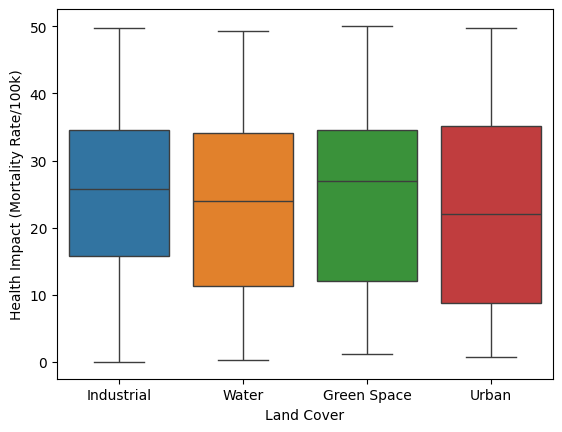

In [10]:
sns.boxplot(x='Land Cover', y='Health Impact (Mortality Rate/100k)', hue='Land Cover', data=df)

<Axes: xlabel='Health Impact (Mortality Rate/100k)', ylabel='Air Quality Index (AQI)'>

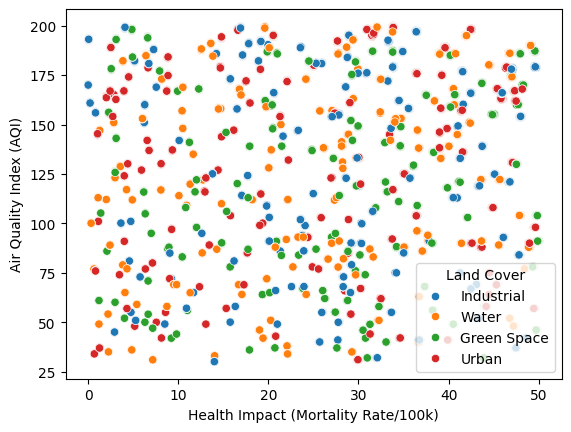

In [11]:
sns.scatterplot(x='Health Impact (Mortality Rate/100k)', y='Air Quality Index (AQI)', hue='Land Cover', data=df)

In [12]:
df.columns

Index(['Temperature (°C)', 'Land Cover', 'Population Density (people/km²)',
       'Energy Consumption (kWh)', 'Air Quality Index (AQI)',
       'Urban Greenness Ratio (%)', 'Health Impact (Mortality Rate/100k)',
       'Wind Speed (km/h)', 'Humidity (%)', 'Annual Rainfall (mm)'],
      dtype='object')

In [13]:
num_cols = df.select_dtypes(include=['number']).columns.drop('Health Impact (Mortality Rate/100k)')
num_cols

Index(['Temperature (°C)', 'Population Density (people/km²)',
       'Energy Consumption (kWh)', 'Air Quality Index (AQI)',
       'Urban Greenness Ratio (%)', 'Wind Speed (km/h)', 'Humidity (%)',
       'Annual Rainfall (mm)'],
      dtype='object')

In [14]:
# impute columns with mean
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df.isnull().sum()

Temperature (°C)                       0
Land Cover                             0
Population Density (people/km²)        0
Energy Consumption (kWh)               0
Air Quality Index (AQI)                0
Urban Greenness Ratio (%)              0
Health Impact (Mortality Rate/100k)    0
Wind Speed (km/h)                      0
Humidity (%)                           0
Annual Rainfall (mm)                   0
dtype: int64

In [15]:
# remove duplicates
df.shape


(118055, 10)

In [16]:
df = df.drop_duplicates()
df.shape

(118000, 10)

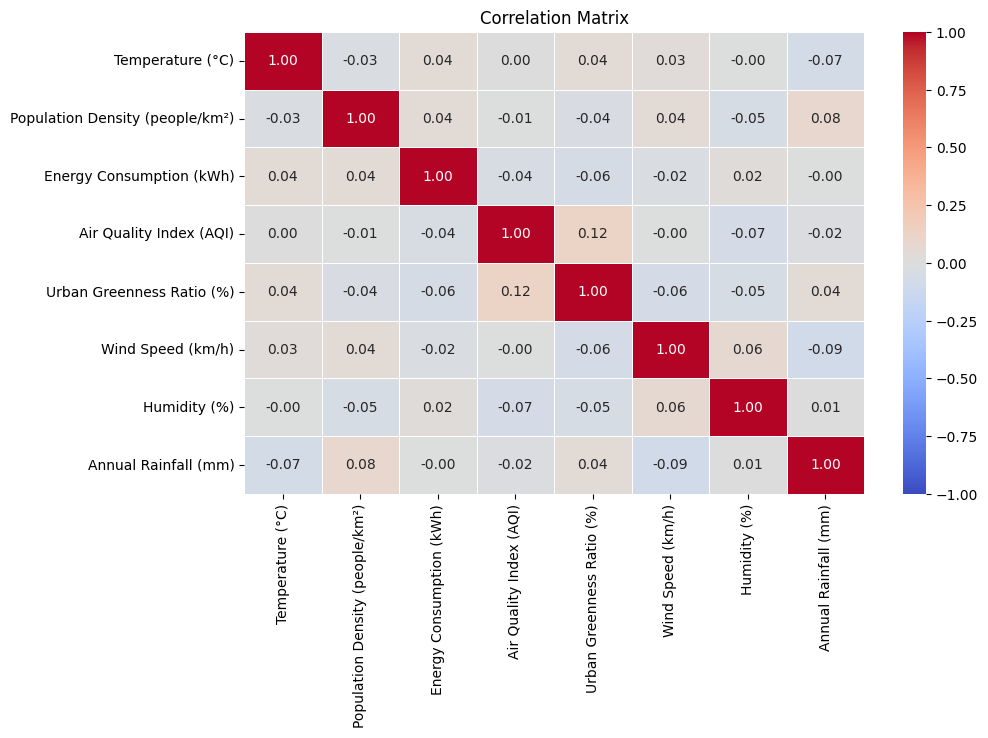

In [17]:
# correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


*There appears to be no major correlation, however we have sufficient data to train a model and develop conclusions*

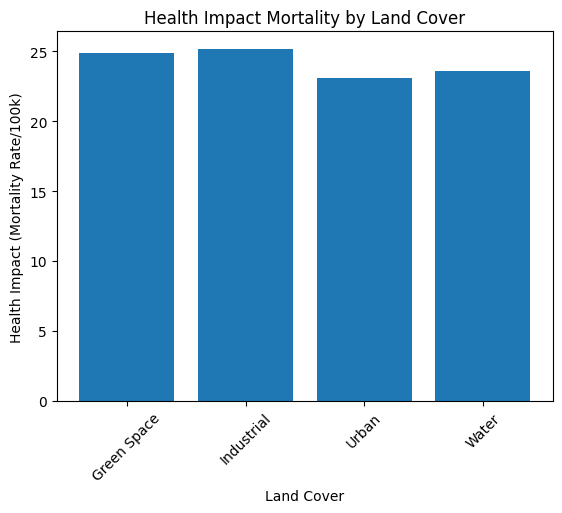

In [18]:
health_impact_mortality = df.groupby('Land Cover')['Health Impact (Mortality Rate/100k)'].mean()
plt.bar(health_impact_mortality.index, health_impact_mortality)
plt.xticks(rotation=45)
plt.xlabel('Land Cover')
plt.ylabel('Health Impact (Mortality Rate/100k)')
plt.title('Health Impact Mortality by Land Cover')
plt.show()

In [19]:
# Encode Categorical Data

df = pd.get_dummies(df, columns=['Land Cover'])

# convert true/false to 1/0
df['Land Cover_Green Space'] = df['Land Cover_Green Space'].astype(int)
df['Land Cover_Industrial'] = df['Land Cover_Industrial'].astype(int)
df['Land Cover_Urban'] = df['Land Cover_Urban'].astype(int)
df['Land Cover_Water'] = df['Land Cover_Water'].astype(int)


In [20]:
df.head()

,Temperature (°C),Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),Land Cover_Green Space,Land Cover_Industrial,Land Cover_Urban,Land Cover_Water
0,32.140727,638.140184,29866.608120,90.967582,51.032061,20.060893,0.017909,46.681317,1750.054664,0,1,0,0
1,28.199772,2757.814606,25461.567500,121.919061,17.819991,45.591306,1.585266,43.291975,758.591768,0,0,0,1
2,11.492930,6020.462986,2539.737270,169.190188,51.045248,10.525874,8.614523,76.935296,2494.912602,0,0,0,1
3,34.909265,9491.952711,32146.724390,90.989624,19.211930,49.900393,0.297596,42.739059,1762.646698,1,0,0,0
4,28.465786,5191.476501,2513.126338,92.082516,51.178231,21.993127,19.375498,43.509082,2134.723878,0,0,0,1


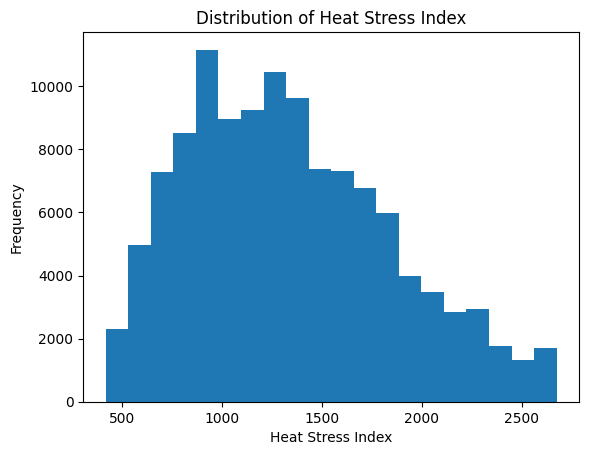

In [21]:
df['Heat Stress Index'] = df['Humidity (%)'] * df['Temperature (°C)']

# plot heat stress index by histogram
plt.hist(df['Heat Stress Index'], bins=20)
plt.xlabel('Heat Stress Index')
plt.ylabel('Frequency')
plt.title('Distribution of Heat Stress Index')
plt.show()

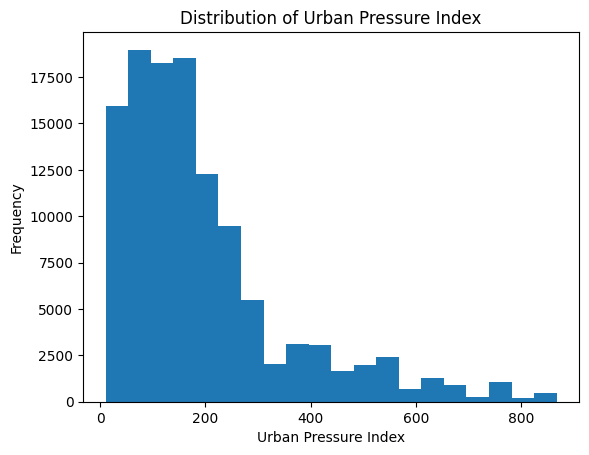

In [22]:
df['Urban Pressure Index'] = df['Population Density (people/km²)'] / df['Urban Greenness Ratio (%)']

# plot urban pressure index by histogram
plt.hist(df['Urban Pressure Index'], bins=20)
plt.xlabel('Urban Pressure Index')
plt.ylabel('Frequency')
plt.title('Distribution of Urban Pressure Index')
plt.show()

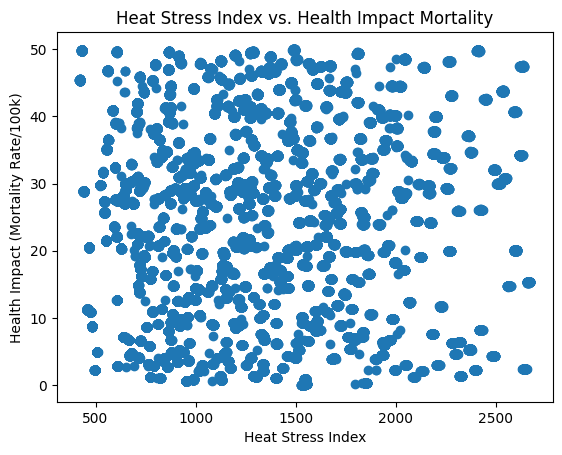

In [23]:
# Scatter plot of heat stress index vs. health impact mortality
plt.scatter(df['Heat Stress Index'], df['Health Impact (Mortality Rate/100k)'])
plt.xlabel('Heat Stress Index')
plt.ylabel('Health Impact (Mortality Rate/100k)')
plt.title('Heat Stress Index vs. Health Impact Mortality')
plt.show()

In [24]:
# There appears to be no correlation.

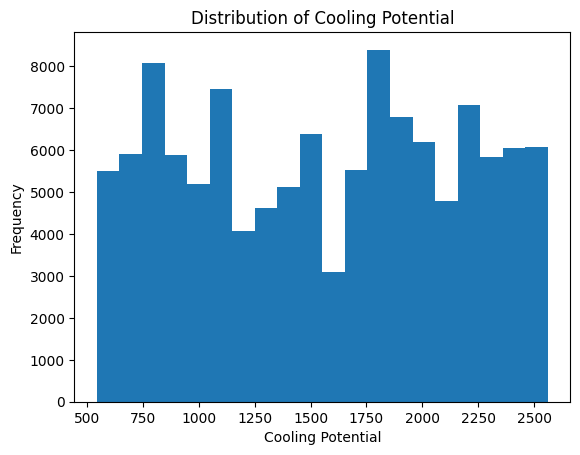

In [25]:
df['Cooling Potential'] = df['Wind Speed (km/h)'] + df['Urban Greenness Ratio (%)'] + df['Annual Rainfall (mm)']

# Histogram of cooling potential
plt.hist(df['Cooling Potential'], bins=20)
plt.xlabel('Cooling Potential')
plt.ylabel('Frequency')
plt.title('Distribution of Cooling Potential')
plt.show()

In [26]:
df.head()

,Temperature (°C),Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),Land Cover_Green Space,Land Cover_Industrial,Land Cover_Urban,Land Cover_Water,Heat Stress Index,Urban Pressure Index,Cooling Potential
0,32.140727,638.140184,29866.608120,90.967582,51.032061,20.060893,0.017909,46.681317,1750.054664,0,1,0,0,1500.371461,12.504692,1801.104634
1,28.199772,2757.814606,25461.567500,121.919061,17.819991,45.591306,1.585266,43.291975,758.591768,0,0,0,1,1220.823821,154.759598,777.997025
2,11.492930,6020.462986,2539.737270,169.190188,51.045248,10.525874,8.614523,76.935296,2494.912602,0,0,0,1,884.211933,117.943652,2554.572373
3,34.909265,9491.952711,32146.724390,90.989624,19.211930,49.900393,0.297596,42.739059,1762.646698,1,0,0,0,1491.989142,494.065538,1782.156224
4,28.465786,5191.476501,2513.126338,92.082516,51.178231,21.993127,19.375498,43.509082,2134.723878,0,0,0,1,1238.520199,101.439154,2205.277607


In [27]:
num_columns = ['Population Density (people/km²)', 'Energy Consumption (kWh)', 'Air Quality Index (AQI)', 'Annual Rainfall (mm)', 'Heat Stress Index', 'Urban Pressure Index', 'Cooling Potential']

### Feature Scaling
Feature scaling is necessary to ensure that all features have the same scale, which can improve the performance of machine learning models. 
In this case, we used standardization to scale the numerical features.

In [28]:
# Feature Scaling for Population Density (people per km^2), Energy Consumption (kWh per capita), GDP per Capita (USD), Annual Rainfall (mm)

scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
df.head()


,Temperature (°C),Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),Land Cover_Green Space,Land Cover_Industrial,Land Cover_Urban,Land Cover_Water,Heat Stress Index,Urban Pressure Index,Cooling Potential
0,32.140727,-1.708336,0.263458,-0.555964,51.032061,20.060893,0.017909,46.681317,0.405558,0,1,0,0,0.324621,-1.136353,0.408240
1,28.199772,-0.920870,-0.051202,0.082265,17.819991,45.591306,1.585266,43.291975,-1.273593,0,0,0,1,-0.226972,-0.248791,-1.324473
2,11.492930,0.291214,-1.688551,1.057010,51.045248,10.525874,8.614523,76.935296,1.667056,0,0,0,1,-0.891163,-0.478495,1.684297
3,34.909265,1.580884,0.426331,-0.555509,19.211930,49.900393,0.297596,42.739059,0.426884,1,0,0,0,0.308082,1.868217,0.376150
4,28.465786,-0.016757,-1.690452,-0.532974,51.178231,21.993127,19.375498,43.509082,1.057037,0,0,0,1,-0.192054,-0.581470,1.092739


### Model Training
We have now scaled our numerical features, so we will test our data on both a linear regression model and a random forest regressor model.

In [29]:
X = df.drop(columns=['Health Impact (Mortality Rate/100k)'])
y = df['Health Impact (Mortality Rate/100k)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model,X_test,y_test,name='Model'):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    
    print(f"--{name}--")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RSME: {rmse:.2f}")
    print(f"R2: {r2:.2f}")
    print("-"*20)
    return r2

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test, 'Linear Regression')

--Linear Regression--
MAE: 11.85
MSE: 192.90
RSME: 13.89
R2: 0.02
--------------------


0.015823902119024846

The linear regression model has very bad evaluation metrics. This is due to the fact that the linear regression model assumes a linear relationship between the features and the target variable. In our case, the relationship between the features and the target variable is non-linear.

In [31]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test, 'Gradient Boosting Regressor')


--Gradient Boosting Regressor--
MAE: 7.50
MSE: 80.80
RSME: 8.99
R2: 0.59
--------------------


0.587789285335871

The gradient boosting regressor model has better evaluation metrics than the linear regression model. This is due to the fact that the gradient boosting regressor model is a non-linear model that can capture complex relationships between the features and the target variable. However, we could do better by using the random forest regression model.

In [32]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test, 'Random Forest Regressor')

--Random Forest Regressor--
MAE: 0.03
MSE: 0.15
RSME: 0.38
R2: 1.00
--------------------


0.9992592268917124

### Judging from the evaluations, 
The random forest regressor model performs exponentially better than the linear regression model and much better than the gradient boosting regressor model. So, we will be using this for our prediction model.

We can go further with the random forest regressor model by tuning its hyperparameters. This will help us improve the model's performance and make more accurate predictions.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

evaluate_model(best_model, X_test, y_test, name='Tuned Random Forest Regressor')

Fitting 5 folds for each of 108 candidates, totalling 540 fits


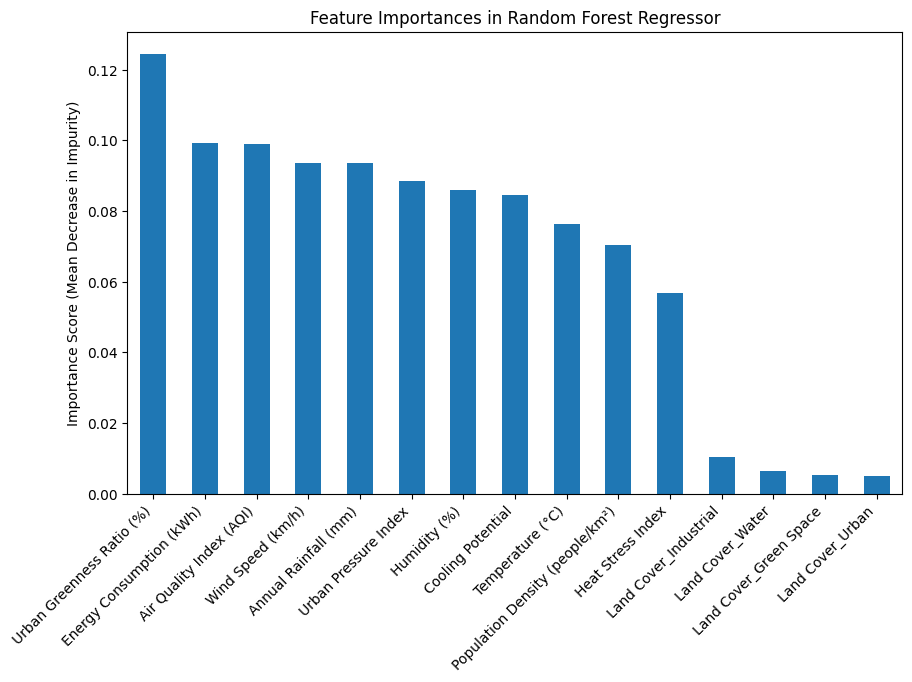

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances in Random Forest Regressor")
plt.ylabel("Importance Score (Mean Decrease in Impurity)")
plt.xticks(rotation=45, ha='right')
plt.show()

### Model Saving
Let's save this model to a file so that we can use it for our prediction app.


In [ ]:
joblib.dump(model, 'heat_control_predictor.joblib')

['heat_control_predictor.joblib']